<font face="微软雅黑" size=5 color=#A52A2A > Lesson 11 插值与拟合

In [1]:
## 画图必备
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 插值问题 interpolation

### 分段线性插值

[2.8 2.4 1.  0.2 1.6 2.  2.4 2.6]


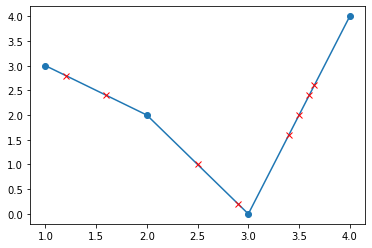

In [2]:
x = [1.2, 1.6, 2.5, 2.9, 3.4, 3.5, 3.6, 3.65]
xp = [1, 2, 3, 4]
fp = [3, 2, 0, 4]
yinter = np.interp(x, xp, fp)
print(yinter)
plt.plot(xp, fp, 'o-')
plt.plot(x, yinter, 'rx')
plt.show()

### 正弦函数分段线性插值

[ 0.00000000e+00  1.18063030e-01  2.36126061e-01  3.54189091e-01
  4.72252121e-01  5.90315152e-01  6.77687624e-01  7.40507651e-01
  8.03327677e-01  8.66147703e-01  9.28967730e-01  9.82383623e-01
  9.60566457e-01  9.38749291e-01  9.16932125e-01  8.95114959e-01
  8.73297793e-01  8.01861494e-01  7.05615630e-01  6.09369766e-01
  5.13123902e-01  4.16878038e-01  3.14100132e-01  1.88460079e-01
  6.28200263e-02 -6.28200263e-02 -1.88460079e-01 -3.14100132e-01
 -4.16878038e-01 -5.13123902e-01 -6.09369766e-01 -7.05615630e-01
 -8.01861494e-01 -8.73297793e-01 -8.95114959e-01 -9.16932125e-01
 -9.38749291e-01 -9.60566457e-01 -9.82383623e-01 -9.28967730e-01
 -8.66147703e-01 -8.03327677e-01 -7.40507651e-01 -6.77687624e-01
 -5.90315152e-01 -4.72252121e-01 -3.54189091e-01 -2.36126061e-01
 -1.18063030e-01 -2.44929360e-16]


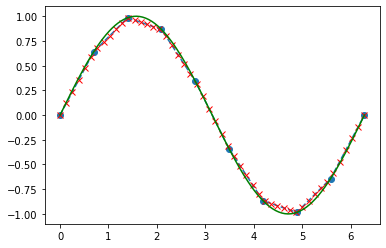

In [3]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)
print(yinterp)
plt.plot(x, y, 'o--')
plt.plot(xvals, yinterp, 'rx')
plt.plot(np.linspace(0, 2*np.pi, 200), np.sin(np.linspace(0, 2*np.pi, 200)), 'g-')
plt.show()

### 样条曲线插值:scipy

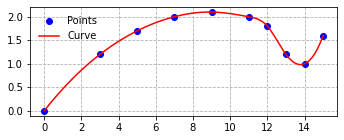

In [16]:
from scipy import interpolate
x = np.array([0, 3, 5, 7, 9, 11, 12, 13, 14, 15])
y = np.array([0, 1.2, 1.7, 2.0, 2.1, 2.0, 1.8, 1.2, 1.0, 1.6])
xnew = np.linspace(0, 15, 150)
tck = interpolate.splrep(x, y, s=0)
yinterp = interpolate.splev(xnew, tck)
fig, ax = plt.subplots(1, 1, figsize=(5.5, 2))
ax.plot(x, y, 'bo', label='Points')
ax.plot(xnew, yinterp, 'r-', label='Curve')
ax.legend(loc='best', frameon=False)
ax.grid(linestyle="--")
plt.show()

(array([0.        , 0.        , 0.        , 0.        , 1.57079633,
       2.35619449, 3.14159265, 3.92699082, 4.71238898, 6.28318531,
       6.28318531, 6.28318531, 6.28318531]), array([ 3.44265545e-18,  5.54608516e-01,  1.21921009e+00,  7.83113675e-01,
        2.45205789e-16, -7.83113675e-01, -1.21921009e+00, -5.54608516e-01,
       -2.44929360e-16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00]), 3)


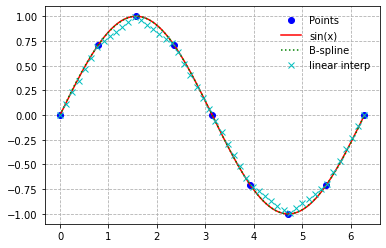

In [4]:
from scipy import interpolate
x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
print(tck)
xnew = np.linspace(0, 2*np.pi, 200)
xvals = np.linspace(0, 2*np.pi, 50)
y_bsp = interpolate.splev(xnew, tck)
y_interp = np.interp(xvals, x, y)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'bo', label='Points')
ax.plot(xnew, np.sin(xnew), 'r-', label='sin(x)')
ax.plot(xnew, y_bsp, 'g:', label='B-spline')
ax.plot(xvals, y_interp, 'cx', label='linear interp')
ax.legend(loc='best', frameon=False)
ax.grid(linestyle="--")
plt.show()

### 练习：

+ 为前面的飞机机翼轮廓数据做分段线性插值 
+ 对数和指数函数上分别取5个点，做分段线性插值和b样条曲线插值，比较结果与精确值的差异

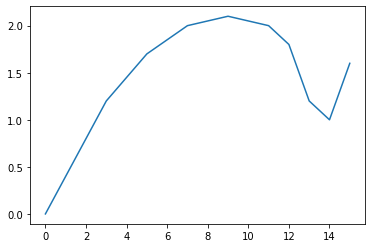

In [43]:
x = np.array([0, 3, 5, 7, 9, 11, 12, 13, 14, 15])
y = np.array([0, 1.2, 1.7, 2.0, 2.1, 2.0, 1.8, 1.2, 1.0, 1.6])
xnew = np.linspace(0, 15, 150)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

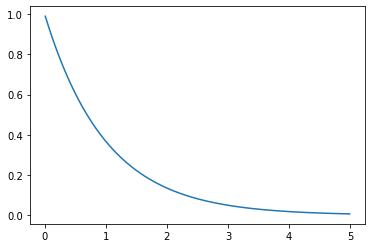

In [41]:
# 指数函数
t = np.arange(0.01, 5.0, 0.01)
s = np.exp(-t)
fig, ax = plt.subplots(1, 1)
ax.plot(t, s)

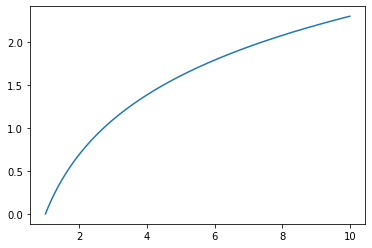

In [42]:
# 对数函数
x = np.arange(1, 10.0, 0.01)
y = np.log(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

# 拟合问题 fitting（approximated）

### 线性最小二乘法

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997 [0.05]


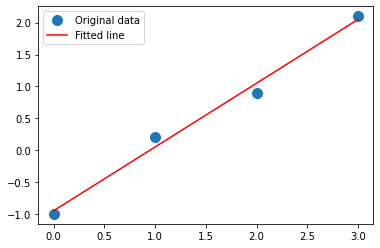

In [72]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
print(A)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
r = np.linalg.lstsq(A, y, rcond=None)[1]
print(m, c, r)
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

### 多项式拟合

In [5]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

<font size=4>构造函数   

In [6]:
p = np.poly1d([1, 2, 3])
print(np.poly1d(p))

   2
1 x + 2 x + 3


In [88]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
print(z)
p = np.poly1d(z)
print(p)
print(p(0.5), p(3.5), p(10))

0.6143849206349238 -0.3473214285714292 22.579365079365022
         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


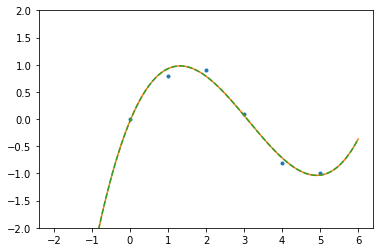

In [10]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
xp = np.linspace(-2, 6, 100)
p5 = np.poly1d(np.polyfit(x, y, 3))
print(p5)
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p5(xp), '--')
plt.ylim(-2,2)
plt.show()

In [83]:
np.polyval([3,0,1], 5)  # 3 * 5**2 + 0 * 5**1 + 1

76

### 应用案例
+ 弹簧系数
+ 血药浓度

In [25]:
# 弹簧系数
C_per = np.array([0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.20,0.21,0.23])
y = np.array([42.0,41.5,45.0,45.5,45.0,47.5,49.0,55.0,50.0,55.0,55.5,60.5])
df = pd.DataFrame(data=[C_per, y], index=['x', 'y'])
df

,0,1,2,3,4,5,6,7,8,9,10,11
x,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.2,0.21,0.23
y,42.0,41.50,45.00,45.50,45.00,47.50,49.00,55.00,50.00,55.0,55.50,60.50


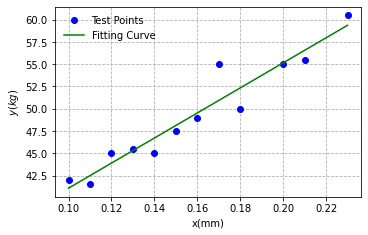

In [46]:
z = np.polyfit(C_per, y, 1)
p = np.poly1d(z)
xp = np.linspace(0.1,0.23, 100)
fig, ax = plt.subplots(1, 1, figsize=(5.5, 3.5))
ax.plot(C_per, y, 'bo', label='Test Points')
ax.plot(xp, p(xp), 'g-', label='Fitting Curve')
ax.legend(loc='best', frameon=False)
ax.grid(linestyle="--")
ax.set_ylabel(r"$y (kg)$")
ax.set_xlabel("x(mm)")
plt.show()

In [27]:
# 血药浓度
time = np.array([0.25,0.5,1,1.5,2,3,4,6,8])
c = np.array([19.21,18.15,15.36,14.10,12.89,9.32,7.45,5.24,3.01])
df = pd.DataFrame(data=[time, c], index=['time', 'c'])
df

,0,1,2,3,4,5,6,7,8
time,0.25,0.50,1.00,1.5,2.00,3.00,4.00,6.00,8.00
c,19.21,18.15,15.36,14.1,12.89,9.32,7.45,5.24,3.01


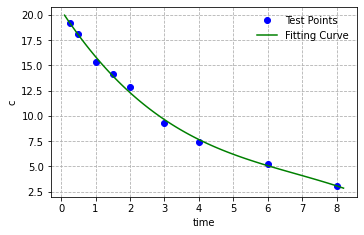

In [35]:
z = np.polyfit(time, c, 3)
p = np.poly1d(z)
xp = np.linspace(0.1, 8.2, 100)
fig, ax = plt.subplots(1, 1, figsize=(5.5, 3.5))
ax.plot(time, c, 'bo', label='Test Points')
ax.plot(xp, p(xp), 'g-', label='Fitting Curve')
ax.legend(loc='best', frameon=False)
ax.grid(linestyle="--")
ax.set_ylabel("c")
ax.set_xlabel("time")
plt.show()

### 练习：
+ 对热敏电阻测量数据做线性最小二乘拟合，求电阻与温度之间的关系 
+ 读取csv数据，对人口增长数据做多项式拟合
+ 对数函数上取10个点，用多项式拟合，比较结果与精确值的差异

In [ ]:
# 热敏电阻
t = np.array([20.5, 32.5, 51, 73, 95.7])
R = np.array([765., 826., 873., 942.,1032.])


In [ ]:
# 人口增长
